# Clustering - DBSCAN

- Use DBSCAN to detect anomalies in other products from the customers dataset. The database name is grocery_db.
- Use DBSCAN to detect anomalies in requests from the curriculum access logs in the curriculum_logs database.
- Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).


In [1]:
# Imports
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

import itertools

import warnings
warnings.filterwarnings("ignore")

from sqlalchemy import text, create_engine

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

import env

In [2]:
def read_sql_query(query, db):
    """
    This function will 
    - accept two strings: an sql query, and the database name
    - read the query from the database into a dataframe
    - return the dataframe
    """
    # using "new" (May 2023) version of reading sql queries with pandas

    # define the database url
    url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/{db}'
    # create the connection
    engine = create_engine(url)
    connection = engine.connect()
    # create the query using text() and the string that has the sql query
    query_t = text(query)

    df = pd.read_sql(query_t, connection)

    return df

In [3]:
df = read_sql_query('SELECT * FROM grocery_customers', 'grocery_db')

In [4]:
df = df.set_index('customer_id')

In [5]:
df.columns = df.columns.str.lower()
df = df.rename(columns={'delicassen': 'deli'})

In [6]:
df.head()


,channel,region,fresh,milk,grocery,frozen,detergents_paper,deli
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Steps

    1. Select variables you want to cluster: df = df[["col1", "col2"]]
    2. Convert to array & dtype float: np_array = df.values.astype("float32", copy = False)
    3. Scale to standard normal:

        scaler = StandardScaler().fit(np_array) np_array = scaler.transform(np_array)

    4. Create DBSCAN object and fit: dbsc = DBSCAN(eps = .75, min_samples = 15).fit(np_array)
    5. Extract labels: labels = dbsc.labels_
    6. Add labels back to original dataframe:

        df['labels'] = labels

    7. Explore:

        df.labels.value_counts() sns.scatterplot(df.col1, df.col2, hue=df.labels)



In [7]:
original_df = df.copy()

In [8]:
df.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,deli
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
def get_dbscan_df_plot(df, col1, col2, eps, min_samples):
    """ 
    This function will
    - accept a dataframe, 2 column names: col1 and col2, epsilon and min_samples for DBSCAN
    - scale the two columns (must be numeric)
    - make, fit, and use DBSCAN
    - plot a scatter plot of the two columns hued by the cluster prediction
    - add scaled columns and DBSCAN labels to df
    - return that df
    """
    ### make a new df with just the two columns
    new_df = df[[col1, col2]]
    ### ensure new_df values are floats and put them into an array of lists
    new_array = new_df.values.astype('float32')
    ### Scale the data
    # make the scaler
    mms = MinMaxScaler()
    # fit the scaler
    mms.fit(new_array)
    # use the scaler
    new_array = mms.transform(new_array)
    ### make/fit/use DBSCAN object
    dbsc = DBSCAN(eps=eps, min_samples=min_samples)
    dbsc.fit(new_array)
    cluster_labels = dbsc.labels_
    ### add scaled data and cluster_labels back to original df
    column_names = [f'scaled_{col1}', f'scaled_{col2}']
    scaled_df = pd.DataFrame(new_array, columns=column_names)
    df = pd.concat([df, scaled_df], axis=1)
    df['clstr_labels'] = cluster_labels
    
    ### plot clusters
    sns.scatterplot(df[col1], df[col2], hue=df.clstr_labels)
    plt.title(f'{col1} by {col2} cluster plot')
    plt.show()
    
    return df
    


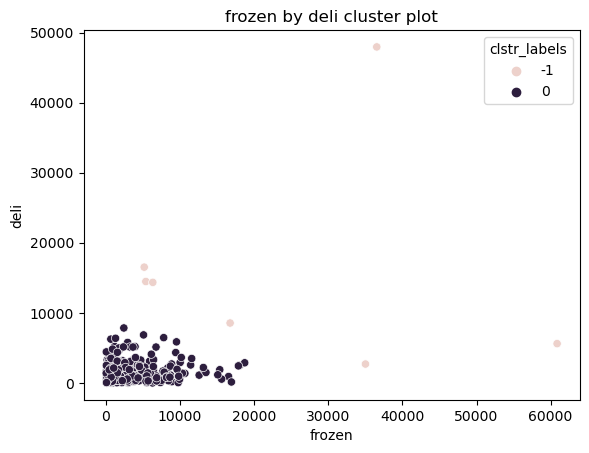

In [20]:
# first I will try frozen and deli
cluster_df = get_dbscan_df_plot(df, 'frozen', 'deli', .1, 10)

In [21]:
cluster_df.clstr_labels.value_counts()

 0    433
-1      7
Name: clstr_labels, dtype: int64

In [22]:
df.head()

,channel,region,fresh,milk,grocery,frozen,detergents_paper,deli
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


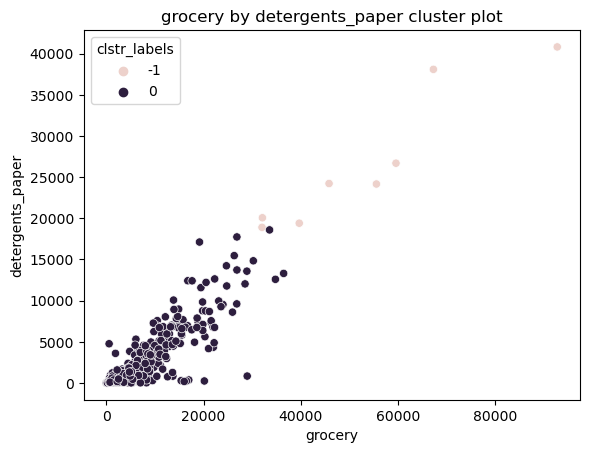

In [24]:
# how about grocery and detergents_paper
cluster_df = get_dbscan_df_plot(df, 'grocery', 'detergents_paper', .1, 10)

## Skipping second part for now
## 3. - Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the clustering project (single unit properties with a logerror).

In [30]:
# In the interest of time, I copied over the cached csv file from the clustering repo
import wrangle_zillow as w

In [31]:
df = w.wrangle_zillow()

csv file found and read
Incoming dataframe to remove_outliers had 50779 rows.
Returned dataframe from remove_outliers has 41918 rows.


In [32]:
df.head()

,property_value,logerror,square_feet,lot_size_sqft,bathrooms,has_halfbath,bedrooms,rooms,has_hottub,has_pool,...,year_built,years_tax_delinquent,bldg_quality_score,lat,long,county,city_id,zip_code,county_Orange,county_Ventura
0,1023282,0.025595,3100,4506,3,1,4,0,0,0,...,1998,0,-1.0,33.634931,-117.869207,Orange,53571,96978,1,0
1,464000,0.055619,1465,12647,1,0,2,5,0,0,...,1967,0,-1.0,34.449266,-119.281531,Ventura,13091,97099,0,1
2,564778,0.005383,1243,8432,2,0,3,6,0,1,...,1962,0,-1.0,33.886168,-117.823170,Orange,21412,97078,1,0
3,145143,-0.103410,2376,13038,3,0,4,0,0,1,...,1970,0,8.0,34.245180,-118.240722,LA,396551,96330,0,0
7,218552,0.101723,738,4214,1,0,2,0,0,0,...,1922,0,5.0,34.149214,-118.239357,LA,45457,96325,0,0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41918 entries, 0 to 77413
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   property_value        41918 non-null  int64  
 1   logerror              41918 non-null  float64
 2   square_feet           41918 non-null  int64  
 3   lot_size_sqft         41918 non-null  int64  
 4   bathrooms             41918 non-null  int64  
 5   has_halfbath          41918 non-null  int64  
 6   bedrooms              41918 non-null  int64  
 7   rooms                 41918 non-null  int64  
 8   has_hottub            41918 non-null  int64  
 9   has_pool              41918 non-null  int64  
 10  ac_type               41918 non-null  object 
 11  heating_type          41918 non-null  object 
 12  month_sold            41918 non-null  int64  
 13  year_built            41918 non-null  int64  
 14  years_tax_delinquent  41918 non-null  int64  
 15  bldg_quality_score 

In [ ]:
### make a new df with just the two columns
new_df = df[[col1, col2]]
### ensure new_df values are floats and put them into an array of lists
new_array = new_df.values.astype('float32')
### Scale the data
# make the scaler
mms = MinMaxScaler()
# fit the scaler
mms.fit(new_array)
# use the scaler
new_array = mms.transform(new_array)
### make/fit/use DBSCAN object
dbsc = DBSCAN(eps=eps, min_samples=min_samples)
dbsc.fit(new_array)
cluster_labels = dbsc.labels_
### add scaled data and cluster_labels back to original df
column_names = [f'scaled_{col1}', f'scaled_{col2}']
scaled_df = pd.DataFrame(new_array, columns=column_names)
df = pd.concat([df, scaled_df], axis=1)
df['clstr_labels'] = cluster_labels

In [34]:
cluster_df = get_dbscan_df_plot(df, 'logerror', 'square_feet', .1, 20)

ValueError: Length of values (41918) does not match length of index (61191)